In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st  


In [2]:
# Import data
adjusted_data = pd.read_csv('adjusted_data.csv', sep=",", engine='python', names=['seconds', 'voltage', 'linear_fit', 'background_voltage', 'background_seconds', 'background_fit', 'residual', 'adjusted_background', 'adjusted_signal', 'adjusted_seconds', 'frequency'])

uncert_voltage = 0.0023701762770099

In [3]:
# Frequency constants

# Rb87
rb87_w0 = 384.230 * (10**12)
rb87_f1 = 2.563005 * (10**9)
rb87_f2 = 4.271676 * (10**9)

rb87_w0_f1 = rb87_w0 + rb87_f1
rb87_w0_f2 = rb87_w0 - rb87_f2

# Rb85
rb85_w0 = 377.107385 * (10**12)
rb85_f2 = 1.264888 * (10**9)
rb85_f3 = 1.770843 * (10**9)

rb85_w0_f2 = rb87_w0 + rb85_f2
rb85_w0_f3 = rb87_w0 - rb85_f3

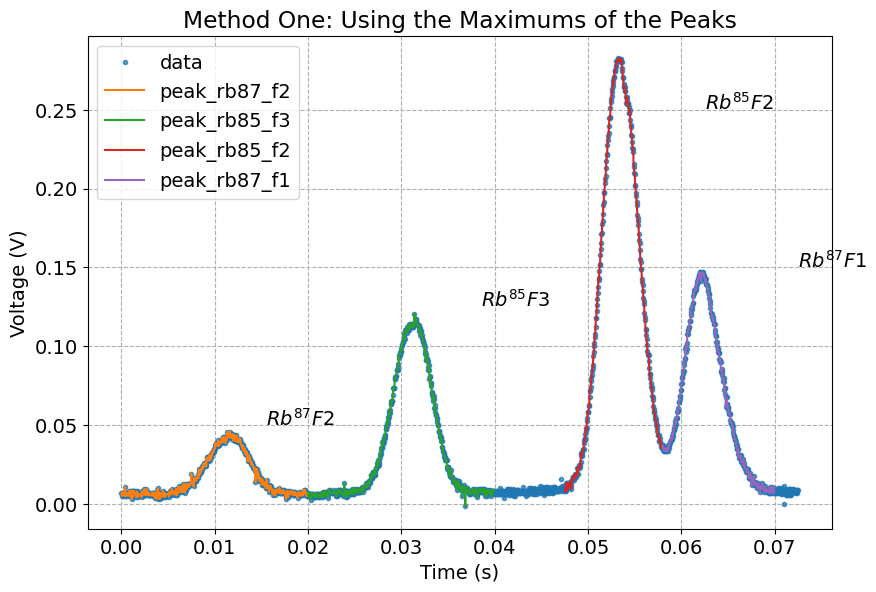

In [69]:
# Determine the peaks

# Rb87 F2
peak_rb87_f2 = adjusted_data.loc[(adjusted_data['adjusted_seconds'] < 0.02)]

# Rb85 F3
peak_rb85_f3 = adjusted_data.loc[(adjusted_data['adjusted_seconds'] >= 0.02) & (adjusted_data['adjusted_seconds'] < 0.04)]

# Rb85 F2
peak_rb85_f2 = adjusted_data.loc[(adjusted_data['adjusted_seconds'] > 0.0475) & (adjusted_data['adjusted_seconds'] <= 0.058)]

# Rb87 F1
peak_rb87_f1 = adjusted_data.loc[(adjusted_data['adjusted_seconds'] > 0.058) & (adjusted_data['adjusted_seconds'] <= 0.07)]

plt.figure(figsize=(9.6,6.4))
plt.rcParams.update({'font.size': 14})
plt.plot(adjusted_data['adjusted_seconds'],adjusted_data['adjusted_signal'],'.',label='data', alpha=0.75)
plt.plot(peak_rb87_f2['adjusted_seconds'],peak_rb87_f2['adjusted_signal'],'-',label='peak_rb87_f2')
plt.plot(peak_rb85_f3['adjusted_seconds'],peak_rb85_f3['adjusted_signal'],'-',label='peak_rb85_f3')
plt.plot(peak_rb85_f2['adjusted_seconds'],peak_rb85_f2['adjusted_signal'],'-',label='peak_rb85_f2')
plt.plot(peak_rb87_f1['adjusted_seconds'],peak_rb87_f1['adjusted_signal'],'-',label='peak_rb87_f1')
plt.text(0.0155,0.05,r'${R b}^{87} F2$')
plt.text(0.0385,0.125,r'${R b}^{85} F3$')
plt.text(0.0625,0.25,r'${R b}^{85} F2$')
plt.text(0.0725,0.15,r'${R b}^{87} F1$')
plt.title('Method One: Using the Maximums of the Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend(loc='upper left')
plt.grid(True,linestyle='--')

In [5]:
# Match maximums to create arrays

N = len(adjusted_data['seconds'])
max_t = max(adjusted_data['adjusted_seconds'])
resolution = max_t / N

# Visual validation
print(f"peak_rb87_f2 max: {max(peak_rb87_f2['adjusted_signal'])}")
print(f"peak_rb85_f3 max: {max(peak_rb85_f3['adjusted_signal'])}")
print(f"peak_rb85_f2 max: {max(peak_rb85_f2['adjusted_signal'])}")
print(f"peak_rb87_f1 max: {max(peak_rb87_f1['adjusted_signal'])}")

peak_rb87_f2_max = max(peak_rb87_f2['adjusted_signal'])
peak_rb87_f2_max_t = adjusted_data.loc[(adjusted_data['adjusted_signal'] == peak_rb87_f2_max)]
# taking average since multiple t with delta >> resolution
peak_rb87_f2_max_t = np.average(peak_rb87_f2_max_t['adjusted_seconds'])

peak_rb85_f3_max = max(peak_rb85_f3['adjusted_signal'])
peak_rb85_f3_max_t = adjusted_data.loc[(adjusted_data['adjusted_signal'] == peak_rb85_f3_max)]
peak_rb85_f3_max_t = np.average(peak_rb85_f3_max_t['adjusted_seconds'])


peak_rb85_f2_max = max(peak_rb85_f2['adjusted_signal'])
peak_rb85_f2_max_t = adjusted_data.loc[(adjusted_data['adjusted_signal'] == peak_rb85_f2_max)]
peak_rb85_f2_max_t = np.average(peak_rb85_f2_max_t['adjusted_seconds'])


peak_rb87_f1_max = max(peak_rb87_f1['adjusted_signal'])
peak_rb87_f1_max_t = adjusted_data.loc[(adjusted_data['adjusted_signal'] == peak_rb87_f1_max)]
peak_rb87_f1_max_t = np.average(peak_rb87_f1_max_t['adjusted_seconds'])

rb87f2_rb85f3 = adjusted_data.loc[(adjusted_data['adjusted_seconds'] > peak_rb87_f2_max_t) & (adjusted_data['adjusted_seconds'] <= peak_rb85_f3_max_t)]
rb87f2_rb85f3_np = rb87f2_rb85f3['adjusted_seconds'].to_numpy()
rb87f2_rb85f3_f_diff = max(rb87f2_rb85f3_np) - min(rb87f2_rb85f3_np)
# rb87f2_rb85f3_f_diff
f1_reading = (rb85_w0_f3 - rb87_w0_f2) / rb87f2_rb85f3_f_diff
# f1_reading

rb85f3_rb85f2 = adjusted_data.loc[(adjusted_data['adjusted_seconds'] > peak_rb85_f3_max_t) & (adjusted_data['adjusted_seconds'] <= peak_rb85_f2_max_t)]
rb85f3_rb85f2_np = rb85f3_rb85f2['adjusted_seconds'].to_numpy()
rb85f3_rb85f2_f_diff = max(rb85f3_rb85f2_np) - min(rb85f3_rb85f2_np)

f2_reading = (rb85_w0_f2 - rb85_w0_f3) / rb85f3_rb85f2_f_diff
# f2_reading

rb85f2_rb87f1 = adjusted_data.loc[(adjusted_data['adjusted_seconds'] > peak_rb85_f2_max_t) & (adjusted_data['adjusted_seconds'] <= peak_rb87_f1_max_t)]
rb85f2_rb87f1_np = rb85f2_rb87f1['adjusted_seconds'].to_numpy()
rb85f2_rb87f1_f_diff = max(rb85f2_rb87f1_np) - min(rb85f2_rb87f1_np)

f3_reading = (rb87_w0_f1 - rb85_w0_f2) / rb85f2_rb87f1_f_diff


peak_rb87_f2 max: 0.0459794559130526
peak_rb85_f3 max: 0.1206382088020638
peak_rb85_f2 max: 0.2825098207138743
peak_rb87_f1 max: 0.1468499062727191


In [6]:

base_f = np.average([f1_reading,f2_reading,f3_reading]) # First calculation

base_f / (10**9)


137.21445146188069

In [7]:
# Fit the peaks and determine FWHM

# Rb87 F2
peak_rb87_f2 = adjusted_data.loc[137:409]

# Rb85 F3
peak_rb85_f3 = adjusted_data.loc[645:910]

# Rb85 F2
peak_rb85_f2 = adjusted_data.loc[1240:1442]

# Rb87 F1
peak_rb87_f1 = adjusted_data.loc[1459:1650]

### Background

# Rb87 F2
peak_rb87_f2_BG = adjusted_data.loc[:154]

# Rb85 F3
peak_rb85_f3_BG = adjusted_data.loc[438:610]

# Rb85 F2
peak_rb85_f2_BG = adjusted_data.loc[939:1166]

# Rb87 F1
peak_rb87_f1_BG = adjusted_data.loc[1740:1812]

background_signal_2 = pd.concat([peak_rb87_f2_BG,peak_rb85_f3_BG,peak_rb85_f2_BG,peak_rb87_f1_BG])


In [8]:
# Fit background

from scipy.stats import linregress

def straightLine(x, m, b):
    return (m*x) + b


result = linregress(background_signal_2['frequency'], background_signal_2['adjusted_signal'])
fit = straightLine(x=adjusted_data['frequency'], m=result.slope, b=result.intercept)



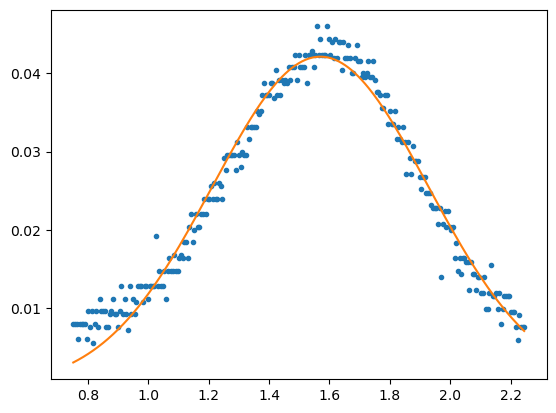

In [9]:
# Fit gaussians

from scipy.optimize import curve_fit

def gaussian(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

param_87f2, param_87f2_cov = curve_fit(gaussian, peak_rb87_f2['frequency'], peak_rb87_f2['adjusted_signal'], p0=[0.04,1.6,0.2])
fit_87f2 = gaussian(peak_rb87_f2['frequency'], param_87f2[0], param_87f2[1], param_87f2[2])

plt.plot(peak_rb87_f2['frequency'],peak_rb87_f2['adjusted_signal'],'.')
plt.plot(peak_rb87_f2['frequency'],fit_87f2,'-')


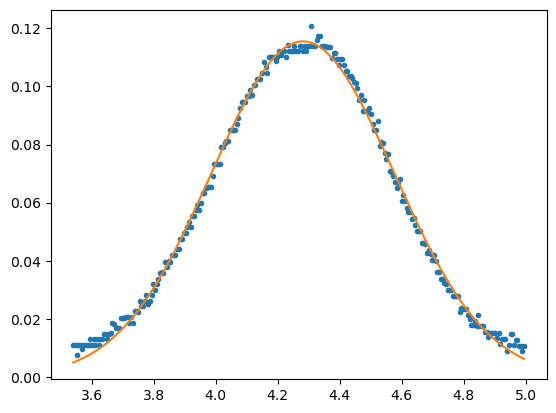

In [10]:

param_85f3, param_85f3_cov = curve_fit(gaussian, peak_rb85_f3['frequency'], peak_rb85_f3['adjusted_signal'], p0=[0.12,4.5,0.8])
fit_85f3 = gaussian(peak_rb85_f3['frequency'], param_85f3[0], param_85f3[1], param_85f3[2])

plt.plot(peak_rb85_f3['frequency'],peak_rb85_f3['adjusted_signal'],'.')
plt.plot(peak_rb85_f3['frequency'],fit_85f3,'-')

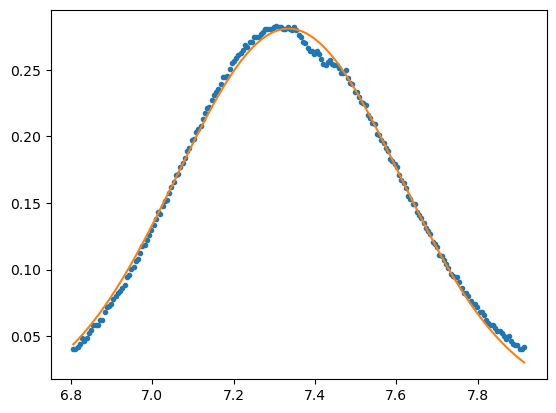

In [11]:
param_85f2, param_85f2_cov = curve_fit(gaussian, peak_rb85_f2['frequency'], peak_rb85_f2['adjusted_signal'], p0=[0.2,7.5,0.8])
fit_85f2 = gaussian(peak_rb85_f2['frequency'], param_85f2[0], param_85f2[1], param_85f2[2])

plt.plot(peak_rb85_f2['frequency'],peak_rb85_f2['adjusted_signal'],'.')
plt.plot(peak_rb85_f2['frequency'],fit_85f2,'-')

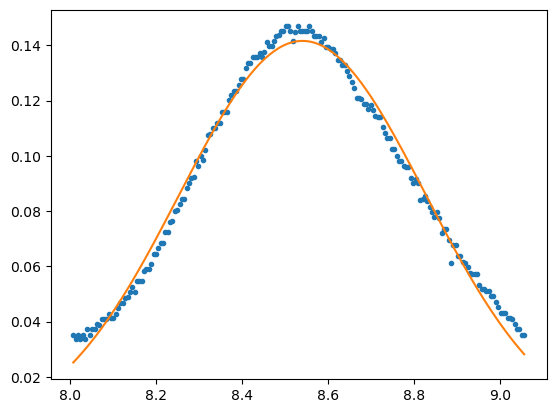

In [12]:
param_87f1, param_87f1_cov = curve_fit(gaussian, peak_rb87_f1['frequency'], peak_rb87_f1['adjusted_signal'], p0=[0.1,9,0.5])
fit_87f1 = gaussian(peak_rb87_f1['frequency'], param_87f1[0], param_87f1[1], param_87f1[2])

plt.plot(peak_rb87_f1['frequency'],peak_rb87_f1['adjusted_signal'],'.')
plt.plot(peak_rb87_f1['frequency'],fit_87f1,'-')

In [13]:
import temp_model as tpm
from scipy.optimize import curve_fit
def model(
        x,

        rb87_f2_a,
        rb87_f2_x0,
        rb87_f2_sigma,

        rb85_f3_a,
        rb85_f3_x0,
        rb85_f3_sigma,

        rb85_f2_a,
        rb85_f2_x0,
        rb85_f2_sigma,

        rb87_f1_a,
        rb87_f1_x0,
        rb87_f1_sigma,

        lin_m,
        lin_b
):
    gaussian_1 = rb87_f2_a*np.exp(-(x-rb87_f2_x0)**2/(2*rb87_f2_sigma**2))
    gaussian_2 = rb85_f3_a*np.exp(-(x-rb85_f3_x0)**2/(2*rb85_f3_sigma**2))
    gaussian_3 = rb85_f2_a*np.exp(-(x-rb85_f2_x0)**2/(2*rb85_f2_sigma**2))
    gaussian_4 = rb87_f1_a*np.exp(-(x-rb87_f1_x0)**2/(2*rb87_f1_sigma**2))
    bg = lin_m * x + lin_b
    return gaussian_1 + gaussian_2 + gaussian_3 + gaussian_4 + bg

best_param, best_param_cov = curve_fit(model, adjusted_data['frequency'], adjusted_data['adjusted_signal'],p0=[param_87f2[0], param_87f2[1], param_87f2[2],
param_85f3[0], param_85f3[1], param_85f3[2],
param_85f2[0], param_85f2[1], param_85f2[2],
param_87f1[0], param_87f1[1], param_87f1[2],
result.slope, result.intercept],maxfev=50000)

best_fit = model(adjusted_data['frequency'], best_param[0], best_param[1], best_param[2], best_param[3], best_param[4], best_param[5], best_param[6], best_param[7], best_param[8], best_param[9], best_param[10], best_param[11], best_param[12], best_param[13])

In [14]:
import scipy.stats as st

def chi_squared(Theory,Data):
    if np.size(Theory)==np.size(Data):
        chi2=np.sum(((Theory-Data)**2)/(0.0023701762770099**2))
        return chi2
    else:
        print('error - arrays of unequal size')
        return -1.


chi2 = chi_squared(Theory=best_fit,Data=adjusted_data['adjusted_signal'])
dof = (np.size(adjusted_data['adjusted_signal']) - 14)
chi2/dof

1.1454208983760965

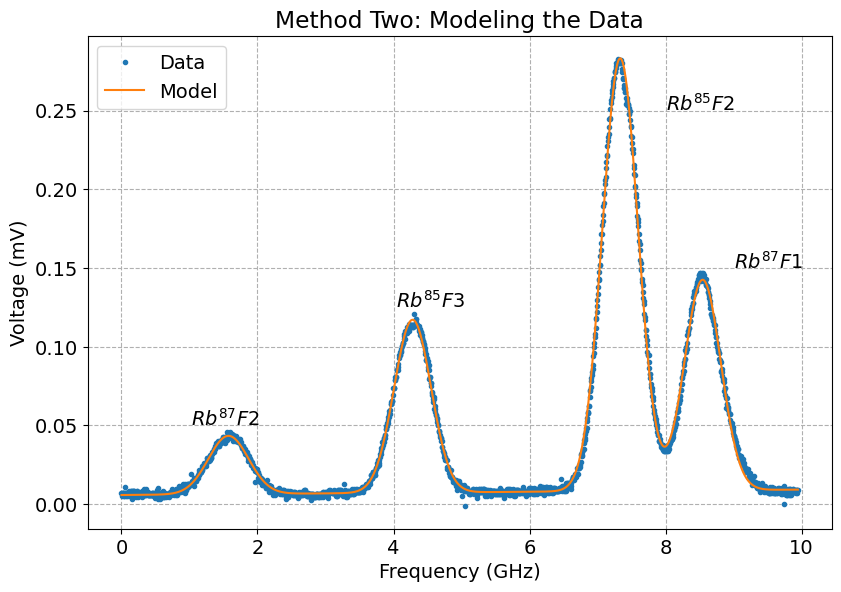

In [70]:
plt.figure(figsize=(9.6,6.4))
plt.rcParams.update({'font.size': 14})

plt.plot(adjusted_data['frequency'], adjusted_data['adjusted_signal'], '.', label='Data')
plt.plot(adjusted_data['frequency'], best_fit,'-', label='Model')
plt.text(1.0155,0.05,r'${R b}^{87} F2$')
plt.text(4.0385,0.125,r'${R b}^{85} F3$')
plt.text(8.0,0.25,r'${R b}^{85} F2$')
plt.text(9.0,0.15,r'${R b}^{87} F1$')

# plt.text(2,0.2,r'$\chi_\nu^2$ = {:.2f}'.format(chi2/dof))
# plt.text(2,0.15,r'prob = {:.2f}'.format(prob))

plt.title('Method Two: Modeling the Data')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Voltage (mV)')
plt.legend(loc='upper left')
plt.grid(True,linestyle='--')

In [16]:
# print('errors= ',np.sqrt(np.diag(best_param_cov))) 
error_matrix = np.sqrt(np.diag(best_param_cov))

rb_87_f2_sigma = best_param[2]
rb_87_f2_sigma_uncert = error_matrix[2]

rb_85_f3_sigma = best_param[5]
rb_85_f3_sigma_uncert = error_matrix[5]

rb_85_f2_sigma = best_param[8]
rb_85_f2_sigma_uncert = error_matrix[8]

rb_87_f1_sigma = best_param[11]
rb_87_f1_sigma_uncert = error_matrix[11]

final equation for T: 


$ T = (\frac{\sigma c}{f_0})^2 \frac{M}{k_B} $

In [17]:
outputs = {
    'isotope': ['rb87f2','rb85f3', 'rb85f2', 'rb87f1'],
    'sigma': [rb_87_f2_sigma * 10**9, rb_85_f3_sigma * 10**9, rb_85_f2_sigma * 10**9,rb_87_f1_sigma * 10**9],
    'sigma uncert': [rb_87_f2_sigma_uncert * 10**9, rb_85_f3_sigma_uncert * 10**9, rb_85_f2_sigma_uncert * 10**9,rb_87_f1_sigma_uncert * 10**9],
    'f_0': [rb87_w0_f2, rb85_w0_f3, rb85_w0_f2, rb87_w0_f1],
    'f_0 uncert': [0,0,0,0]
}
# outputs

outputs = pd.DataFrame(data=outputs)
outputs


,isotope,sigma,sigma uncert,f_0,f_0 uncert
0,rb87f2,2.956129e+08,3.277093e+06,3.842257e+14,0
1,rb85f3,2.724322e+08,1.000749e+06,3.842282e+14,0
2,rb85f2,2.629059e+08,4.018560e+05,3.842313e+14,0
3,rb87f1,2.684908e+08,8.693281e+05,3.842326e+14,0


In [18]:

temperatures = {
    'isotope': ['rb87f2','rb85f3', 'rb85f2', 'rb87f1'],
    'temperature (K)': [
        tpm.temperature(sigma=outputs['sigma'][0],f_0=outputs['f_0'][0],isotope='87Rb'),
        tpm.temperature(sigma=outputs['sigma'][1],f_0=outputs['f_0'][1],isotope='85Rb'),
        tpm.temperature(sigma=outputs['sigma'][2],f_0=outputs['f_0'][2],isotope='85Rb'),
        tpm.temperature(sigma=outputs['sigma'][3],f_0=outputs['f_0'][3],isotope='87Rb'),
    ],
    'temperature uncert': [
        tpm.uncertainty(sigma=outputs['sigma'][0], sigma_sigma=outputs['sigma uncert'][0], f_0=outputs['f_0'][0], sigma_f_0=outputs['f_0 uncert'][0],isotope='87Rb'),
        tpm.uncertainty(sigma=outputs['sigma'][1], sigma_sigma=outputs['sigma uncert'][1], f_0=outputs['f_0'][1], sigma_f_0=outputs['f_0 uncert'][1],isotope='85Rb'),
        tpm.uncertainty(sigma=outputs['sigma'][2], sigma_sigma=outputs['sigma uncert'][2], f_0=outputs['f_0'][2], sigma_f_0=outputs['f_0 uncert'][2],isotope='85Rb'),
        tpm.uncertainty(sigma=outputs['sigma'][3], sigma_sigma=outputs['sigma uncert'][3], f_0=outputs['f_0'][3], sigma_f_0=outputs['f_0 uncert'][3],isotope='87Rb')
    ],
    'temperature (C)': [
        tpm.temperature(sigma=outputs['sigma'][0],f_0=outputs['f_0'][0],isotope='87Rb') - 273.15,
        tpm.temperature(sigma=outputs['sigma'][1],f_0=outputs['f_0'][1],isotope='85Rb') - 273.15,
        tpm.temperature(sigma=outputs['sigma'][2],f_0=outputs['f_0'][2],isotope='85Rb') - 273.15,
        tpm.temperature(sigma=outputs['sigma'][3],f_0=outputs['f_0'][3],isotope='87Rb') - 273.15,
    ]
}

temperatures = pd.DataFrame(data=temperatures)
temperatures


,isotope,temperature (K),temperature uncert,temperature (C)
0,rb87f2,556.841491,12.346018,283.691491
1,rb85f3,462.060144,3.394651,188.910144
2,rb85f2,430.303907,1.315453,157.153907
3,rb87f1,459.333372,2.974489,186.183372


In [19]:

temp_data = [
    (temperatures['temperature (K)'][0],temperatures['temperature uncert'][0]),
    (temperatures['temperature (K)'][1],temperatures['temperature uncert'][1]),
    (temperatures['temperature (K)'][2],temperatures['temperature uncert'][2]),
    (temperatures['temperature (K)'][3],temperatures['temperature uncert'][3])
]
    
weighted_avg = tpm.weighted_avg(data=temp_data)
weighted_avg


(439.0599060076774, 41.779599179411804)

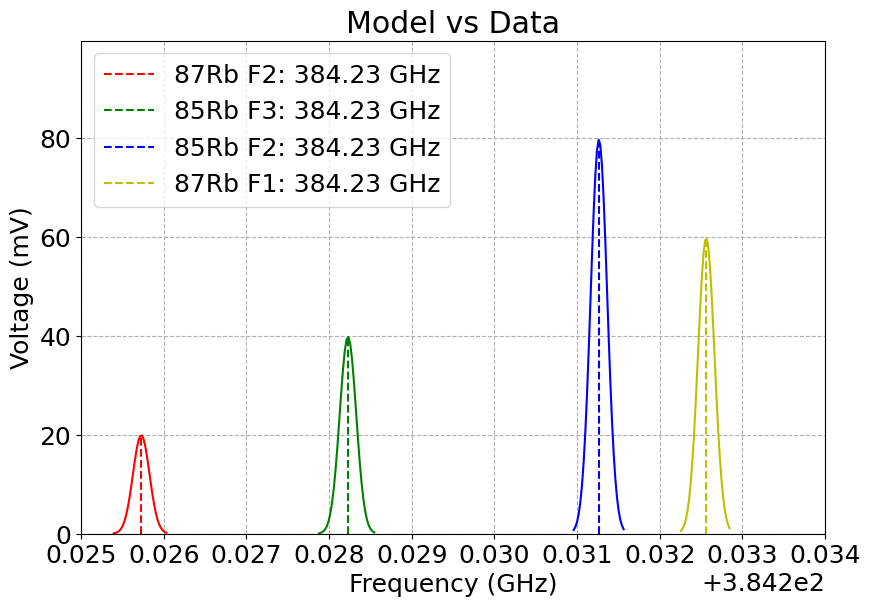

In [64]:
plt.figure(figsize=(9.6,6.4))
plt.rcParams.update({'font.size': 18})

# plt.plot(adjusted_data['frequency'], adjusted_data['adjusted_signal'], '.', label='Data')
# plt.plot(adjusted_data['frequency'], best_fit,'-', label='Model')
# plt.text(1.0155,0.05,r'${R b}^{87} F2$')
# plt.text(4.0385,0.125,r'${R b}^{85} F3$')
# plt.text(8.0,0.25,r'${R b}^{85} F2$')
# plt.text(9.0,0.15,r'${R b}^{87} F1$')

plt.axvline(x=(rb87_w0_f2/(10**(12))), color='r',ymax=0.2, linestyle='--', label='87Rb F2: {:.2f} GHz'.format(rb87_w0_f2/(10**(12))))

mu_1,sigma_1 = rb87_w0_f2/(10**(12)), 0.0001
s_1 = np.random.normal(mu_1, sigma_1, 1000)
count_1, bins_1, ignored_1 = plt.hist(s_1, 30, density=False, alpha=0.0)
plt.plot(bins_1, (1/(sigma_1 * np.sqrt(2 * np.pi)) * np.exp( - (bins_1 - mu_1)**2 / (2 * sigma_1**2) )) / 200, color='r')
# plt.plot(s_1, np.zeros_like(s_1), 'r|', markersize=10)

plt.axvline(x=(rb85_w0_f3/(10**(12))), color='g', ymax=0.4, linestyle='--', label='85Rb F3: {:.2f} GHz'.format(rb85_w0_f3/(10**(12))))

mu_2,sigma_2 = rb85_w0_f3/(10**(12)), 0.0001
s_2 = np.random.normal(mu_2, sigma_2, 1000)
count_2, bins_2, ignored_2 = plt.hist(s_2, 30, density=False, alpha=0.0)
plt.plot(bins_2, (1/(sigma_2 * np.sqrt(2 * np.pi)) * np.exp( - (bins_2 - mu_2)**2 / (2 * sigma_2**2) )) / (200/2), color='g')

plt.axvline(x=(rb85_w0_f2/(10**(12))), color='b', ymax=0.8, linestyle='--', label='85Rb F2: {:.2f} GHz'.format(rb85_w0_f2/(10**(12))))

mu_3,sigma_3 = rb85_w0_f2/(10**(12)), 0.0001
s_3 = np.random.normal(mu_3, sigma_3, 1000)
count_3, bins_3, ignored_3 = plt.hist(s_3, 30, density=False, alpha=0.0)
plt.plot(bins_3, (1/(sigma_3 * np.sqrt(2 * np.pi)) * np.exp( - (bins_3 - mu_3)**2 / (2 * sigma_3**2) )) / (200/4), color='b')


plt.axvline(x=(rb87_w0_f1/(10**(12))), ymax=0.6, color='y', linestyle='--', label='87Rb F1: {:.2f} GHz'.format(rb87_w0_f1/(10**(12))))

mu_4,sigma_4 = rb87_w0_f1/(10**(12)), 0.0001
s_4 = np.random.normal(mu_4, sigma_4, 1000)
count_4, bins_4, ignored_4 = plt.hist(s_4, 30, density=False, alpha=0.0)
plt.plot(bins_4, (1/(sigma_4 * np.sqrt(2 * np.pi)) * np.exp( - (bins_4 - mu_4)**2 / (2 * sigma_4**2) )) / (200/3), color='y')

plt.xlim(384.225,384.234)
# plt.xs

# plt.text(2,0.2,r'$\chi_\nu^2$ = {:.2f}'.format(chi2/dof))
# plt.text(2,0.15,r'prob = {:.2f}'.format(prob))

plt.title('Model vs Data')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Voltage (mV)')
plt.legend(loc='upper left')
plt.grid(True,linestyle='--')